<a href="https://colab.research.google.com/github/DajeanArcila/biblioteca_pandas/blob/main/desafio_RotatividadeRRHH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

from sklearn import metrics
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

In [80]:
df=pd.read_excel("/content/Base_dados - Rotatividade RH.xlsx")

In [81]:
df.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0


In [82]:
df.describe()

,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Desligamento
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,18.690769,28.349231,3.027463,2.940577,6131.587062,10.098864,0.221538
std,9.652262,8.014983,1.174226,1.148514,2689.075566,6.242406,0.415602
min,3.000000,18.000000,1.000242,1.002868,2004.500000,0.003734,0.000000
25%,10.000000,22.000000,1.988753,1.968571,4023.752500,4.978000,0.000000
50%,19.000000,27.000000,3.058911,2.923458,5562.950000,9.413546,0.000000
75%,27.000000,33.000000,4.022709,3.964356,7814.480000,14.749310,0.000000
max,35.000000,49.000000,4.992102,4.999415,11957.290000,41.638350,1.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ KB


In [84]:
display(df)

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0
...,...,...,...,...,...,...,...,...,...,...
645,2021-08-28,NaT,33,31,2.260088,1.539328,Pleno,7940.88,6.847854,0
646,2022-02-24,NaT,27,23,4.611915,2.521799,Junior,4893.95,4.583937,0
647,2022-10-22,NaT,19,21,4.688376,4.641638,Junior,3838.70,11.306088,0
648,2021-09-27,NaT,32,32,3.551361,3.998147,Pleno,4739.81,4.343341,0


In [85]:
media_idade = df['Idade'].mean()
media_salario= df['Salario'].mean()
print('a idade media e: {:.0f} anos '.format(media_idade))
print('a media salarial e de: R${:.2f}'.format(media_salario))

a idade media e: 28 anos 
a media salarial e de: R$6131.59


In [86]:
meses_serviço= df['Meses_de_Servico'].max()
print('o max de meses de serviço registrado e de:',meses_serviço)
meses_serviço= df['Meses_de_Servico'].mean()
print('a media de meses_serviço geral e de: {:.2f}'.format(meses_serviço))

o max de meses de serviço registrado e de: 35
a media de meses_serviço geral e de: 18.69


In [87]:
df.corr()

,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Desligamento
Meses_de_Servico,1.000000,0.027947,-0.024655,0.033250,-0.006803,0.027014,-0.064710
Idade,0.027947,1.000000,0.061952,0.006640,0.747714,0.116294,0.007267
Pontuacao_Desempenho,-0.024655,0.061952,1.000000,0.077092,0.039920,-0.018382,0.131827
Satisfacao_Trabalho,0.033250,0.006640,0.077092,1.000000,-0.004195,-0.029168,-0.025693
Salario,-0.006803,0.747714,0.039920,-0.004195,1.000000,0.148416,-0.006518
Horas_Extras,0.027014,0.116294,-0.018382,-0.029168,0.148416,1.000000,0.190657
Desligamento,-0.064710,0.007267,0.131827,-0.025693,-0.006518,0.190657,1.000000


In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#escolaridade
le.fit(df.Meses_de_Servico)
df.Meses_de_Servico = le.transform(df.Meses_de_Servico)

# gênero
le.fit(df.Data_Contratacao)
df.Data_Contratacao = le.transform(df.Data_Contratacao)

#regiao
le.fit(df.Horas_Extras)
df.Horas_Extras = le.transform(df.Horas_Extras)

<Axes: xlabel='Idade', ylabel='Count'>

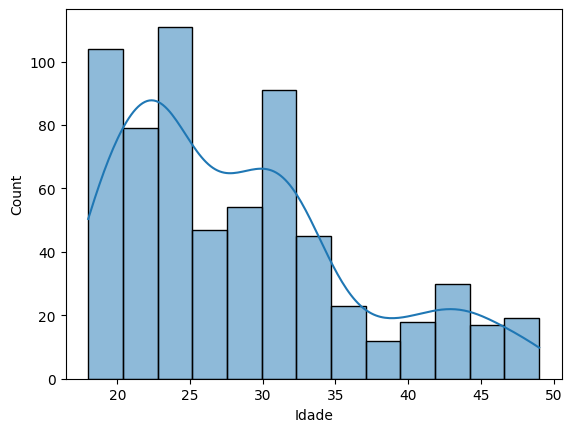

In [89]:
sns.histplot(df, x="Idade", kde=True)

<Axes: xlabel='Salario', ylabel='Count'>

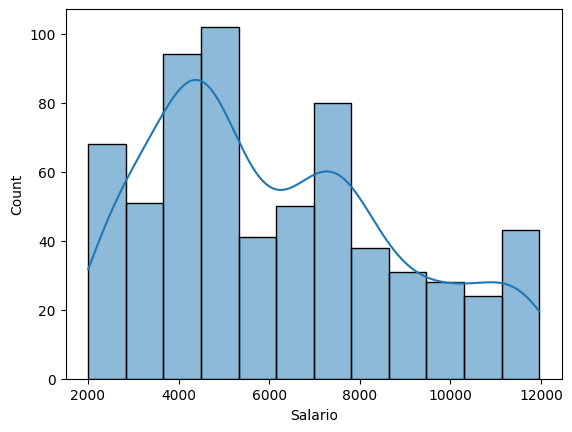

In [90]:
sns.histplot(df, x="Salario", kde=True)

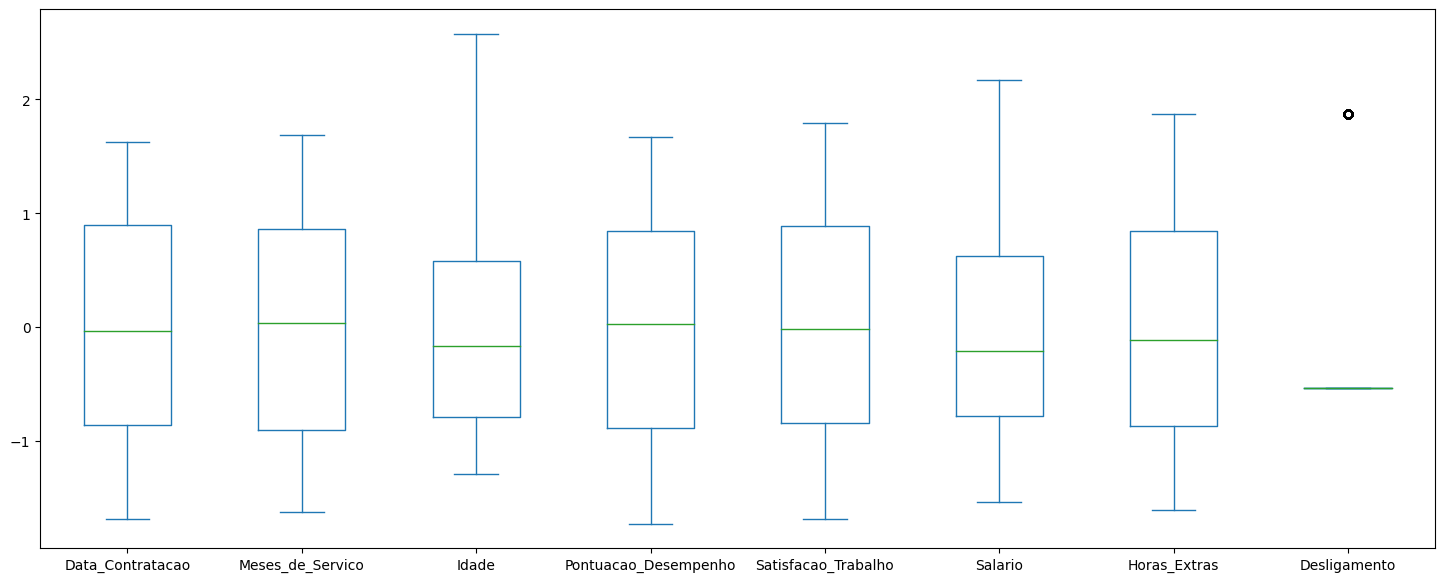

In [91]:
numeric_cols = df.select_dtypes('number').columns

df[numeric_cols].apply(scale).plot.box(figsize=(18,7));


In [92]:
import statsmodels.formula.api as smf

In [97]:
#???
#modelo MRLS
function = 'Desligamento~Idade+Data_Desligamento+Meses_de_Servico+Idade+Pontuacao_Desempenho+Satisfacao_Trabalho+Salario+Horas_Extras+Data_Contratacao'
model = smf.ols(formula=function, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Desligamento   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.734e+24
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        20:57:48   Log-Likelihood:                 16569.
No. Observations:                 650   AIC:                        -3.312e+04
Df Residuals:                     642   BIC:                        -3.309e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------